In [18]:
import pandas as pd
import numpy as np

np.random.seed(42) # for reproducibility

num_students = 50

# Generate random CGPA values between 6.0 and 10.0
cgpa_values = np.round(np.random.uniform(6.0, 10.0, num_students), 2)

# Generate package data (e.g., in Lakhs per annum).
# Let's make it correlated with CGPA: higher CGPA generally leads to higher packages.
package_values = []
for cgpa in cgpa_values:
    if cgpa >= 8.5:
        # High CGPA, likely to get a higher package (e.g., 8 to 15 LPA)
        package_values.append(np.round(np.random.uniform(8.0, 15.0), 2))
    elif cgpa >= 7.0:
        # Medium CGPA, likely to get a medium package (e.g., 4 to 8 LPA)
        package_values.append(np.round(np.random.uniform(4.0, 8.0), 2))
    else:
        # Lower CGPA, likely to get a lower package (e.g., 2 to 4 LPA)
        package_values.append(np.round(np.random.uniform(2.0, 4.0), 2))

# Create the DataFrame
df = pd.DataFrame({
    'cgpa': cgpa_values,
    'package': package_values
})



In [19]:
df.head()

,cgpa,package
0,7.50,7.88
1,9.80,13.43
2,8.93,14.58
3,8.39,7.58
4,6.62,3.20


In [20]:
x=df.drop(columns=['package']).values
y=df['package'].values

In [21]:
x

array([[7.5 ],
       [9.8 ],
       [8.93],
       [8.39],
       [6.62],
       [6.62],
       [6.23],
       [9.46],
       [8.4 ],
       [8.83],
       [6.08],
       [9.88],
       [9.33],
       [6.85],
       [6.73],
       [6.73],
       [7.22],
       [8.1 ],
       [7.73],
       [7.16],
       [8.45],
       [6.56],
       [7.17],
       [7.47],
       [7.82],
       [9.14],
       [6.8 ],
       [8.06],
       [8.37],
       [6.19],
       [8.43],
       [6.68],
       [6.26],
       [9.8 ],
       [9.86],
       [9.23],
       [7.22],
       [6.39],
       [8.74],
       [7.76],
       [6.49],
       [7.98],
       [6.14],
       [9.64],
       [7.04],
       [8.65],
       [7.25],
       [8.08],
       [8.19],
       [6.74]])

In [22]:
y

array([ 7.88, 13.43, 14.58,  7.58,  3.2 ,  3.84,  2.18,  9.37,  4.18,
       10.28,  2.78,  9.9 , 13.8 ,  2.71,  2.56,  3.09,  4.56,  7.21,
        4.3 ,  7.95,  7.09,  2.4 ,  4.02,  7.26,  6.83, 13.1 ,  3.54,
        4.3 ,  5.43,  2.23,  7.45,  3.25,  2.66,  8.44, 10.18, 10.28,
        6.92,  3.28, 14.21,  5.89,  2.24,  6.85,  3.52, 11.93,  7.08,
       11.46,  6.09,  5.71,  4.1 ,  2.22])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [24]:
x_train

array([[7.76],
       [6.62],
       [7.73],
       [6.8 ],
       [9.46],
       [6.26],
       [7.47],
       [8.93],
       [8.4 ],
       [6.14],
       [8.43],
       [7.82],
       [7.5 ],
       [7.04],
       [9.64],
       [9.14],
       [6.08],
       [7.16],
       [8.65],
       [9.88],
       [6.39],
       [9.86],
       [6.62],
       [9.8 ],
       [8.06],
       [6.56],
       [6.23],
       [8.08],
       [9.33],
       [9.23],
       [8.37],
       [6.73],
       [8.19],
       [7.17],
       [7.22],
       [6.19],
       [8.39],
       [6.74],
       [8.74],
       [6.68]])

In [25]:
y_train

array([ 5.89,  3.2 ,  4.3 ,  3.54,  9.37,  2.66,  7.26, 14.58,  4.18,
        3.52,  7.45,  6.83,  7.88,  7.08, 11.93, 13.1 ,  2.78,  7.95,
       11.46,  9.9 ,  3.28, 10.18,  3.84, 13.43,  4.3 ,  2.4 ,  2.18,
        5.71, 13.8 , 10.28,  5.43,  2.56,  4.1 ,  4.02,  6.92,  2.23,
        7.58,  2.22, 14.21,  3.25])

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.coef_

array([2.6943821])

In [29]:
lr.intercept_

np.float64(-14.312327011769382)

In [30]:
lr.predict(x_test)

array([ 8.45520174, 12.09261757,  3.17421282,  5.22194322,  4.14419038,
        3.82086452,  9.47906694,  5.14111175,  7.18884215,  7.512168  ])

<Axes: >

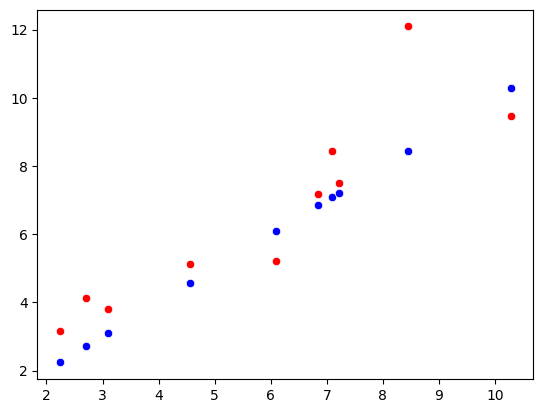

In [31]:
import seaborn as sns
sns.scatterplot(x=y_test, y=lr.predict(x_test), color="red")
sns.scatterplot(x=y_test, y=y_test, color="blue")

now i make   my own mathematical impletation

In [32]:
class MyLinearRegression:
  def __init__(self):
    self.m=None
    self.b=None
  def fit(self,x_train,y_train):
    numerator  =0
    denominator =0

    for i in range(x_train.shape[0]):
      numerator = numerator+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
      denominator = denominator+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))
    self.m = numerator/denominator
    self.b = (y_train.mean()-(self.m*x_train.mean()))
    print(self.m)
    print(self.b)


  def predict(self,x_test):
    return self.m*x_test +self.b

In [33]:
lr = MyLinearRegression()
lr.fit(x_train,y_train)  #same as original class


[2.6943821]
[-14.31232701]


In [34]:
lr.predict(x_test) #same to same

array([[ 8.45520174],
       [12.09261757],
       [ 3.17421282],
       [ 5.22194322],
       [ 4.14419038],
       [ 3.82086452],
       [ 9.47906694],
       [ 5.14111175],
       [ 7.18884215],
       [ 7.512168  ]])

Text(0, 0.5, 'package in LPA')

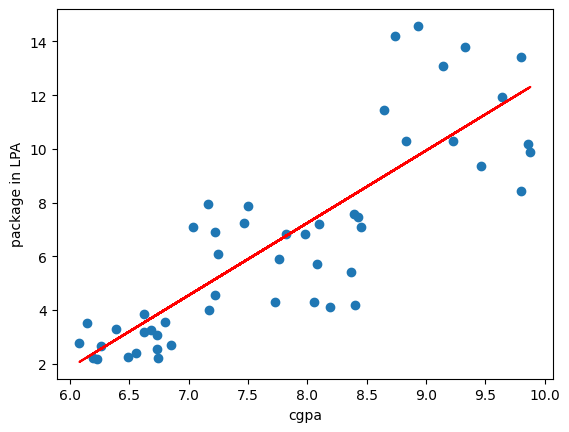

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')  #this is regression
plt.xlabel('cgpa')
plt.ylabel('package in LPA')

#from now here we study about Regression Metrices

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score
import numpy as np

In [44]:
y_prediction = lr.predict(x_test)

In [45]:
print("MAE:",mean_absolute_error(y_test,y_prediction))
print("MSE:",mean_squared_error(y_test,y_prediction))
print("RMSE:",np.sqrt(mean_absolute_error(y_test,y_prediction)))
print("R2_SCORE:",r2_score(y_test,y_prediction))#tell the accuracy

MAE: 1.1008198784111323
MSE: 2.0608036224647375
RMSE: 1.0491996370620476
R2_SCORE: 0.6726328636020207


Text(0, 0.5, 'package in LPA')

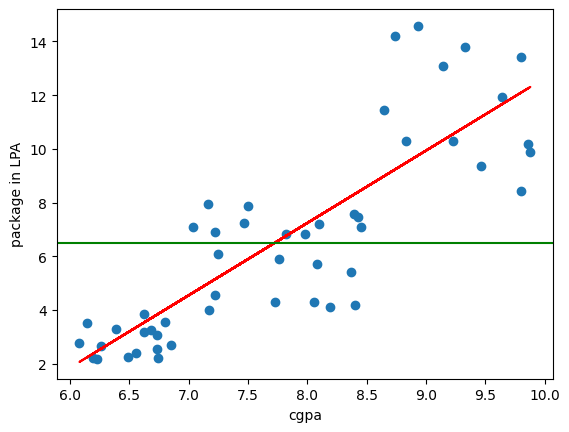

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')  #this is regression
plt.axhline(y=df['package'].mean(),color='green') #this is mean line
plt.xlabel('cgpa')
plt.ylabel('package in LPA')